In [1]:
import sys
import os
# Add the project root to sys.path
sys.path.append(os.path.abspath('..'))

from Functions.gradientdescent_lib import *
from Functions.PLOT import plot

In [2]:
def theta_analytic_OLS(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y
    #np.linalg.pinv used to ensure numerical stability

np.random.seed(10)


x_train, x_test, y_train, y_test = generateData(250, noise = 0.25)
#500 points give no noticable overfitting
x_train = x_train.flatten(); x_test = x_test.flatten()

n_degrees = 20
poly_degrees = list(range(1, n_degrees+1))
MSEs_train = np.zeros(len(poly_degrees), dtype=float)
MSEs_test = np.zeros(len(poly_degrees), dtype=float)


noIntercept = False


for p in poly_degrees:
    #train model on train data
    X_train = featureMat(x_train, p, noIntercept=noIntercept)
    theta = theta_analytic_OLS(X_train, y_train)  
    X_test = featureMat(x_test, p, noIntercept=noIntercept)

    y_train_pred = X_train @ theta
    y_test_pred = X_test @ theta

    MSE_train = MSE(y_train, y_train_pred)
    MSE_test = MSE(y_test, y_test_pred)

    MSEs_train[p-1] = MSE_train
    MSEs_test[p-1] = MSE_test



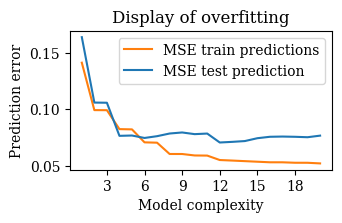

In [3]:
plot(2, poly_degrees, 
     [
         MSEs_train, MSEs_test
     ],
     ['MSE train predictions', 'MSE test prediction'],
     'figures', 'overfitting', 'Model complexity', 'Prediction error', 'Display of overfitting', True, False, save=True)



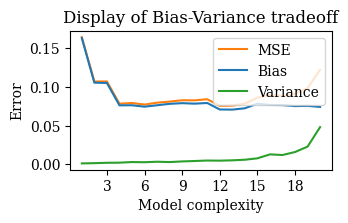

In [4]:
#Show bias-variance tradeoff by resampling using Bootstrap

n_bootstraps = 200
MSEs = np.zeros(len(poly_degrees))
variances = np.zeros(len(poly_degrees))
biases = np.zeros(len(poly_degrees))

for i, p in enumerate(poly_degrees):
    X_train = featureMat(x_train, p, noIntercept=noIntercept)
    X_test = featureMat(x_test, p, noIntercept=noIntercept)

    y_pred = np.empty((n_bootstraps, len(y_test)))

    for b in range(n_bootstraps):
        X_re, y_re = resample(X_train, y_train)
        
        #train on resampled data
        theta = theta_analytic_OLS(X_re, y_re)

        #predict
        y_pred[b, :] = X_test @ theta


    predictions_mean = np.mean(y_pred, axis=0)

    mse = np.mean(np.mean((y_pred - y_test)**2, axis = 1))
    bias = np.mean((y_test - predictions_mean)**2)
    variance = np.mean(np.mean((y_pred - predictions_mean)**2, axis = 0))

    MSEs[i] = mse
    biases[i] = bias
    variances[i] = variance


plot(
    3, poly_degrees, 
    [
        MSEs, biases, variances
    ],
    ['MSE', 'Bias', 'Variance'],
    'figures', 'biasvariancetradeoff', 'Model complexity', 'Error', 'Display of Bias-Variance tradeoff', 
    True, save=True
)